# Introduction to Python and some techniques to make it faster

## 1. Basic Python
## 2. Numpy and Matplotlib
## 3. Make Python faster with Numba and Cython

Some useful links:
[Python](https://www.python.org/),
[Anaconda](https://www.anaconda.com/what-is-anaconda/),
[Numerical Computation: Numpy & Scipy](https://docs.scipy.org/doc/),
[Plot: Matplotlib](https://matplotlib.org/),
[Image Processing: PIL & Pillow](https://pillow.readthedocs.io/en/latest/),
[Convex Optimization: cvxopt & cvxpy](http://www.cvxpy.org/en/latest/),
[Graph: networkx](https://networkx.github.io/),
[Machine Learning: scikit-learn](http://scikit-learn.org/stable/),
[Deep Learning: PyTorch](http://pytorch.org/)

## 1. Basic Python
Python is: 

1. Interpreted language: not compiled. The interpreter translates codes into machine codes when executed;
2. Not as efficient as C++, Java, etc (10 - 400 time slower); 
3. Faster (easier) to code;
4. Has a lot of packages

In [1]:
# There is Python 2 and Python 3, and they differ in some places.
from __future__ import print_function
from __future__ import division
from six.moves import range

In [2]:
# Hello World
print('Hello World!')

Hello World!


In [3]:
# Built-in data types
flag = True # bool
a = 1 # int
b = 0.5 # float
c = 'Hello World' # str
print('data | type')
print(flag, '|', type(flag))
print(a, '|', type(a))
print(b, '|', type(b))
print(c, '|', type(c))

data | type
True | <type 'bool'>
1 | <type 'int'>
0.5 | <type 'float'>
Hello World | <type 'str'>


In [4]:
# Built-in containers
lst = [1, 2, 3, a, b, c]  # list: lst[0], lst[1], lst[-1], lst.append(), lst.pop()
tpl = (1, 2, 3, a, b, c)  # tuple: immutable
st = set(lst)             # set: 1 in set --> True
mdict = {'a':1, 'b':2, 'c':3}  # mdict['a'] --> 1
print(lst)
print(tpl)
print(st)
print(mdict)

[1, 2, 3, 1, 0.5, 'Hello World']
(1, 2, 3, 1, 0.5, 'Hello World')
set([0.5, 1, 2, 3, 'Hello World'])
{'a': 1, 'c': 3, 'b': 2}


In [5]:
# Control flow
# conditional
a = 1
if a > 0:
    print(a)
elif a < 0:
    print(-1 * a)
else:
    print(0)
# loops
for i in range(3):
    print(i)
i = 0
while i < 3:
    print(i)
    i += 1

1
0
1
2
0
1
2


In [6]:
# function
from math import sqrt
def vector_norm(v, norm='l2'):
    result = 0
    if norm == 'l2':
        for i in range(len(v)):
            result += v[i]**2
        result = sqrt(result)
    elif norm == 'l1':
        for i in range(len(v)):
            result += abs(v[i])
    else:
        for i in range(len(v)):
            result = max(abs(v[i]), result)
    return result
# call the function
v = [0, -3, 4]
print(vector_norm(v))
print(vector_norm(v, 'l1'))

5.0
7


## 2. Numpy and Matplotlib
Numpy library implements n-dimensional arrays (and operations on it) and many linear algebra operations (solve linear systems, find eigenvalues, SVD decompostion, least square, etc). Matplotlib is a library for making plots, similar to plot functions in Matlab.

In [7]:
import numpy as np

In [8]:
lst = [1, 2, 3]
a = np.array(lst)
b = np.array(lst, dtype=np.float64)
print(lst)
print(a)
print(a.dtype)
print(b)
print(b.dtype)

[1, 2, 3]
[1 2 3]
int64
[ 1.  2.  3.]
float64


In [9]:
# Similar to Matlab, numpy has functions to create array
a = np.arange(10)
print(a)

x = np.linspace(0, 1, 11)
print(x)

A = np.eye(2)
print(A)
print(A.shape)

M = np.zeros((2, 3))
print(M)

M = np.random.randn(3, 3)
print(M)

[0 1 2 3 4 5 6 7 8 9]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[[ 1.  0.]
 [ 0.  1.]]
(2, 2)
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
[[-0.87099955  0.02771682  0.20970556]
 [ 1.64286845  0.11097339  0.73760906]
 [ 1.71937588  0.16182725  0.95788579]]


In [10]:
# Slicing
print(a[0:2])
print(a[::2])
print(a[1::2])
print(a[::-1])

[0 1]
[0 2 4 6 8]
[1 3 5 7 9]
[9 8 7 6 5 4 3 2 1 0]


In [11]:
b = np.arange(3)
# solve A x = b
x = np.linalg.solve(M, b)
print(x)
print(np.dot(M, x))
print(np.linalg.norm(np.dot(M, x) - b))

[  0.09281968  41.76558461  -5.13464291]
[ -4.44089210e-16   1.00000000e+00   2.00000000e+00]
6.28036983474e-16


In [12]:
# Example
def jacobi(A, b, x_0, tol=1e-3, maxSteps=100):
    """
    Jacobi iteration solver.

    @args
    A: coefficient matrix, numpy ndarray of two dimensions
    b: right hand side vector, numpy ndarray of one dimension
    x_0: initial value vector, numpy ndarray of one dimension
    tol: tolerance, iteration stops when the residual is smaller than tol, float
    maxSteps: maximum number of steps, int

    @return
    solution at the end of the iteration, numpy ndarray of one dimension
    """
    m, n = A.shape
    step = 0
    residual_magnitude = np.linalg.norm(b - np.dot(A, x_0))

    x = np.copy(x_0)
    x_temp = np.copy(x)

    while residual_magnitude > tol and step < maxSteps:
        x_temp = b - np.dot((A - np.diag(np.diag(A))), x)
        x_temp /= np.diag(A)
        x = x_temp
        residual_magnitude = np.linalg.norm(b - np.dot(A, x))
        step += 1

    return x

def gaussSeidel(A, b, x_0, tol=1e-3, maxSteps=100):
    """
    Gauss-Seidel iteration solver.

    @args
    A: coefficient matrix, numpy ndarray of two dimensions
    b: right hand side vector, numpy ndarray of one dimension
    x_0: initial value vector, numpy ndarray of one dimension
    tol: tolerance, iteration stops when the residual is smaller than tol, float
    maxSteps: maximum number of steps, int

    @return
    solution at the end of the iteration, numpy ndarray of one dimension
    """
    m, n = A.shape
    step = 0
    residual_magnitude = np.linalg.norm(b - np.dot(A, x_0))

    x = np.copy(x_0)

    while residual_magnitude > tol and step < maxSteps:
        for i in range(n):
            temp = b[i] - np.dot(A[i, :], x) + A[i, i] * x[i]
            x[i] = temp/A[i, i]
        residual_magnitude = np.linalg.norm(b - np.dot(A, x))
        step += 1
    
    return x


def sor(A, b, x_0, w=1, tol=1e-3, maxSteps=100):
    """
    Succesive Over Relaxation iteration solver.

    @args
    A: coefficient matrix, numpy ndarray of two dimensions
    b: right hand side vector, numpy ndarray of one dimension
    x_0: initial value vector, numpy ndarray of one dimension
    w: over relaxation coefficient, 1 <= w < 2, float
    tol: tolerance, iteration stops when the residual is smaller than tol, float
    maxSteps: maximum number of steps, int

    @return
    solution at the end of the iteration, numpy ndarray of one dimension
    """
    m, n = A.shape
    step = 0
    residual_magnitude = np.linalg.norm(b - np.dot(A, x_0))

    x = np.copy(x_0)

    while residual_magnitude > tol and step < maxSteps:
        for i in range(n):
            temp = b[i] - np.dot(A[i, :], x) + A[i, i] * x[i]
            x[i] *= (1 - w)
            x[i] += w * (temp/A[i, i])
        residual_magnitude = np.linalg.norm(b - np.dot(A, x))
        step += 1
    
    return x

In [13]:
n = 100
A = np.eye(n+1)
for i in range(1, n):
    A[i, i-1] = -1
    A[i, i+1] = -1
    A[i, i] = 2 + 4.0 * (1/n)**2
b = np.zeros((n+1,))
b[0] = -1
b[-1] = 2
print(A)
#print(b)

[[ 1.      0.      0.     ...,  0.      0.      0.    ]
 [-1.      2.0004 -1.     ...,  0.      0.      0.    ]
 [ 0.     -1.      2.0004 ...,  0.      0.      0.    ]
 ..., 
 [ 0.      0.      0.     ...,  2.0004 -1.      0.    ]
 [ 0.      0.      0.     ..., -1.      2.0004 -1.    ]
 [ 0.      0.      0.     ...,  0.      0.      1.    ]]


In [14]:
x_0 = np.copy(b)
x_direct = np.linalg.solve(A, b)
x_jacobi = jacobi(A, b, x_0, tol=1e-12, maxSteps=300)
x_gs = gaussSeidel(A, b, x_0, tol=1e-12, maxSteps=300)
x_sor = sor(A, b, x_0, w=1.9375, tol=1e-12, maxSteps=300)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

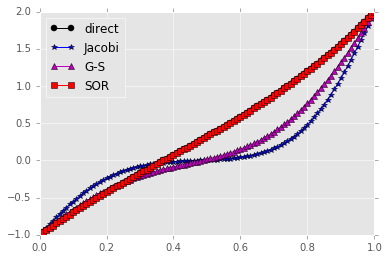

In [16]:
x = np.linspace(0, 1, 101)
plt.plot(x, x_direct, '-ok', label='direct')
plt.plot(x, x_jacobi, '-*b', label='Jacobi')
plt.plot(x, x_gs, '-^m', label='G-S')
plt.plot(x, x_sor, '-sr', label='SOR')
plt.legend(loc='best')

## 3. Make Python faster with Numba and Cython
Numba is a library to make the code faster. It uses Just-In-Time compilation technology to compile Python functions and make it faster. When a function is called, Numba analyzes and figure out the type of the function's arguments, and make a compiled version of the function. Next time when the function is called (with the same argument types), this compiled version is used, saving the work of the Python interpreter and making the execution faster.

In [17]:
import numba as nb
# Example
@nb.jit
def jacobi(A, b, x_0, tol=1e-3, maxSteps=100):
    """
    Jacobi iteration solver.

    @args
    A: coefficient matrix, numpy ndarray of two dimensions
    b: right hand side vector, numpy ndarray of one dimension
    x_0: initial value vector, numpy ndarray of one dimension
    tol: tolerance, iteration stops when the residual is smaller than tol, float
    maxSteps: maximum number of steps, int

    @return
    solution at the end of the iteration, numpy ndarray of one dimension
    """
    m, n = A.shape
    step = 0
    residual_magnitude = np.linalg.norm(b - np.dot(A, x_0))

    x = np.copy(x_0)
    x_temp = np.copy(x)

    while residual_magnitude > tol and step < maxSteps:
        x_temp = b - np.dot((A - np.diag(np.diag(A))), x)
        x_temp /= np.diag(A)
        x = x_temp
        residual_magnitude = np.linalg.norm(b - np.dot(A, x))
        step += 1

    return x

@nb.jit
def gaussSeidel(A, b, x_0, tol=1e-3, maxSteps=100):
    """
    Gauss-Seidel iteration solver.

    @args
    A: coefficient matrix, numpy ndarray of two dimensions
    b: right hand side vector, numpy ndarray of one dimension
    x_0: initial value vector, numpy ndarray of one dimension
    tol: tolerance, iteration stops when the residual is smaller than tol, float
    maxSteps: maximum number of steps, int

    @return
    solution at the end of the iteration, numpy ndarray of one dimension
    """
    m, n = A.shape
    step = 0
    residual_magnitude = np.linalg.norm(b - np.dot(A, x_0))

    x = np.copy(x_0)

    while residual_magnitude > tol and step < maxSteps:
        for i in range(n):
            temp = b[i] - np.dot(A[i, :], x) + A[i, i] * x[i]
            x[i] = temp/A[i, i]
        residual_magnitude = np.linalg.norm(b - np.dot(A, x))
        step += 1
    
    return x

@nb.jit
def sor(A, b, x_0, w=1, tol=1e-3, maxSteps=100):
    """
    Succesive Over Relaxation iteration solver.

    @args
    A: coefficient matrix, numpy ndarray of two dimensions
    b: right hand side vector, numpy ndarray of one dimension
    x_0: initial value vector, numpy ndarray of one dimension
    w: over relaxation coefficient, 1 <= w < 2, float
    tol: tolerance, iteration stops when the residual is smaller than tol, float
    maxSteps: maximum number of steps, int

    @return
    solution at the end of the iteration, numpy ndarray of one dimension
    """
    m, n = A.shape
    step = 0
    residual_magnitude = np.linalg.norm(b - np.dot(A, x_0))

    x = np.copy(x_0)

    while residual_magnitude > tol and step < maxSteps:
        for i in range(n):
            temp = b[i] - np.dot(A[i, :], x) + A[i, i] * x[i]
            x[i] *= (1 - w)
            x[i] += w * (temp/A[i, i])
        residual_magnitude = np.linalg.norm(b - np.dot(A, x))
        step += 1
    
    return x

In [18]:
x_0 = np.copy(b)
x_direct = np.linalg.solve(A, b)
x_jacobi = jacobi(A, b, x_0, tol=1e-12, maxSteps=300)
x_gs = gaussSeidel(A, b, x_0, tol=1e-12, maxSteps=300)
x_sor = sor(A, b, x_0, w=1.9375, tol=1e-12, maxSteps=300)

In [19]:
%timeit x_jacobi=jacobi.py_func(A, b, x_0, tol=1e-12, maxSteps=300)

10 loops, best of 3: 26.6 ms per loop


In [20]:
%timeit x_jacobi=jacobi(A, b, x_0, tol=1e-12, maxSteps=300)

100 loops, best of 3: 13.5 ms per loop


In [21]:
%timeit x_gs = gaussSeidel.py_func(A, b, x_0, tol=1e-12, maxSteps=300)

1 loop, best of 3: 189 ms per loop


In [22]:
%timeit x_gs = gaussSeidel(A, b, x_0, tol=1e-12, maxSteps=300)

100 loops, best of 3: 7.45 ms per loop


In [23]:
%timeit x_sor = sor.py_func(A, b, x_0, w=1.9375, tol=1e-12, maxSteps=300)

1 loop, best of 3: 170 ms per loop


In [24]:
%timeit x_sor = sor(A, b, x_0, w=1.9375, tol=1e-12, maxSteps=300)

100 loops, best of 3: 6.9 ms per loop


Cython allows one to declare types for functions, variables and classes, and Cython compile these typded scripts to efficient C codes.

In [25]:
%load_ext cython

In [26]:
%%cython
import numpy as np
cimport numpy as c_np

def numpy_c():
    cdef c_np.ndarray[double, ndim=1] c_arr
    c_arr = np.random.rand(1000)
    cdef int i
    for i in range(1000):
        c_arr[i] += 1

In [34]:
%%cython
import numpy as np
cimport numpy as c_np
cimport cython

# Example
@cython.boundscheck(False)
@cython.wraparound(False)
@cython.cdivision(True)
@cython.embedsignature(True)
def jacobi_c(c_np.ndarray[double, ndim=2] A, 
             c_np.ndarray[double, ndim=1] b, 
             c_np.ndarray[double, ndim=1] x_0, 
             double tol=1e-3, 
             int maxSteps=100):
    """
    Jacobi iteration solver.

    @args
    A: coefficient matrix, numpy ndarray of two dimensions
    b: right hand side vector, numpy ndarray of one dimension
    x_0: initial value vector, numpy ndarray of one dimension
    tol: tolerance, iteration stops when the residual is smaller than tol, float
    maxSteps: maximum number of steps, int

    @return
    solution at the end of the iteration, numpy ndarray of one dimension
    """
    cdef int m, n, step
    cdef double residual_magnitude
    
    m = A.shape[0]
    n = A.shape[1]
    step = 0
    residual_magnitude = np.linalg.norm(b - np.dot(A, x_0))
    
    cdef c_np.ndarray[double, ndim=1] x
    cdef c_np.ndarray[double, ndim=1] x_temp
    
    x = np.copy(x_0)
    x_temp = np.copy(x)

    while residual_magnitude > tol and step < maxSteps:
        x_temp = b - np.dot((A - np.diag(np.diag(A))), x)
        x_temp /= np.diag(A)
        x = x_temp
        residual_magnitude = np.linalg.norm(b - np.dot(A, x))
        step += 1

    return x

@cython.boundscheck(False)
@cython.wraparound(False)
@cython.cdivision(True)
@cython.embedsignature(True)
def gaussSeidel_c(c_np.ndarray[double, ndim=2] A, 
                  c_np.ndarray[double, ndim=1] b, 
                  c_np.ndarray[double, ndim=1] x_0, 
                  double tol=1e-3, 
                  int maxSteps=100):
    """
    Gauss-Seidel iteration solver.

    @args
    A: coefficient matrix, numpy ndarray of two dimensions
    b: right hand side vector, numpy ndarray of one dimension
    x_0: initial value vector, numpy ndarray of one dimension
    tol: tolerance, iteration stops when the residual is smaller than tol, float
    maxSteps: maximum number of steps, int

    @return
    solution at the end of the iteration, numpy ndarray of one dimension.
    """
    cdef int m, n, step = 0
    cdef double residual_magnitude
    
    m = A.shape[0]
    n = A.shape[1]
    step = 0
    residual_magnitude = np.linalg.norm(b - np.dot(A, x_0))

    cdef c_np.ndarray[double, ndim=1] x
    cdef double temp
    
    x = np.copy(x_0)

    while residual_magnitude > tol and step < maxSteps:
        for i in range(n):
            temp = b[i] - np.dot(A[i, :], x) + A[i, i] * x[i]
            x[i] = temp/A[i, i]
        residual_magnitude = np.linalg.norm(b - np.dot(A, x))
        step += 1
    
    return x


def sor_c(c_np.ndarray[double, ndim=2] A, 
          c_np.ndarray[double, ndim=1] b, 
          c_np.ndarray[double, ndim=1] x_0, 
          double w=1.0, 
          double tol=1e-3, 
          int maxSteps=100):
    """
    Succesive Over Relaxation iteration solver.

    @args
    A: coefficient matrix, numpy ndarray of two dimensions
    b: right hand side vector, numpy ndarray of one dimension
    x_0: initial value vector, numpy ndarray of one dimension
    w: over relaxation coefficient, 1 <= w < 2, float
    tol: tolerance, iteration stops when the residual is smaller than tol, float
    maxSteps: maximum number of steps, int

    @return
    solution at the end of the iteration, numpy ndarray of one dimension
    """
    cdef int m, n, step = 0
    cdef double residual_magnitude
    
    m = A.shape[0]
    n = A.shape[1]
    step = 0
    residual_magnitude = np.linalg.norm(b - np.dot(A, x_0))
    
    cdef c_np.ndarray[double, ndim=1] x
    cdef double temp

    x = np.copy(x_0)

    while residual_magnitude > tol and step < maxSteps:
        for i in range(n):
            temp = b[i] - np.dot(A[i, :], x) + A[i, i] * x[i]
            x[i] *= (1 - w)
            x[i] += w * (temp/A[i, i])
        residual_magnitude = np.linalg.norm(b - np.dot(A, x))
        step += 1
    
    return x


In [35]:
%timeit x_jacobi=jacobi_c(A, b, x_0, tol=1e-12, maxSteps=300)

10 loops, best of 3: 29.5 ms per loop


In [36]:
%timeit x_gs = gaussSeidel_c(A, b, x_0, tol=1e-12, maxSteps=300)

10 loops, best of 3: 75.3 ms per loop


In [37]:
%timeit x_sor = sor_c(A, b, x_0, w=1.9375, tol=1e-12, maxSteps=300)

10 loops, best of 3: 75.8 ms per loop


## 4. More examples
https://github.com/barbagroup/numba_tutorial_scipy2016/tree/master/notebooks

## 5. Q&A